Maham Waseem 27257

Meanshift-Image Segmentation

Importing Important Libraries

In [1]:
import numpy as np
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import random

Loading Image Function

In [2]:
# Function to load the image
def load_image(image_path):
    originImg = cv2.imread(image_path)
    originShape = originImg.shape
    return originImg, originShape

Preprocessing the image

In [3]:
# Function to reshape the image into a flat array
def reshape_image_to_flat_array(originImg):
    flatImg = np.reshape(originImg, [-1, 3])  # Flatten the image (pixels x RGB)
    return flatImg


Sciketlearn Bandwidth Estimate

In [4]:
# Function to estimate the bandwidth using scikit-learn's estimate_bandwidth function
def estimate_bandwidth_sklearn(flatImg, quantile=0.2, n_samples=500):
    bandwidth = estimate_bandwidth(flatImg, quantile=quantile, n_samples=n_samples)
    return bandwidth


Performing Meanshift

In [5]:
# Function to perform MeanShift clustering
def perform_meanshift_clustering(flatImg, bandwidth):
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flatImg)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    return labels, cluster_centers

In [6]:
# Function to get the number of unique clusters
def get_number_of_clusters(labels):
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    return n_clusters_, labels_unique


Generating Bright Color Boundaries

In [7]:
# Function to generate random bright colors
def generate_bright_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        colors.append((random.randint(150, 255), random.randint(150, 255), random.randint(150, 255)))
    return colors

# Function to draw cluster boundaries with different colors
def draw_cluster_boundaries(originImg, labels, labels_unique, originShape):
    boundary_image = originImg.copy()

    # Generate distinct bright colors for each cluster
    bright_colors = generate_bright_colors(len(labels_unique))

    # Loop through each cluster to detect boundaries
    for idx, cluster_id in enumerate(labels_unique):
        # Create a mask for the current cluster
        mask = (labels == cluster_id)
        mask_reshaped = mask.reshape(originShape[:2])

        # Find contours for the cluster mask
        contours, _ = cv2.findContours(mask_reshaped.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw the boundaries in the unique color for each cluster
        for contour in contours:
            if len(contour) > 5:  # Ignore very small clusters
                cv2.drawContours(boundary_image, [contour], -1, bright_colors[idx], 2)  # Different colors for each cluster

    return boundary_image, bright_colors

Image Visualization Function

In [8]:
# Function to plot the original image, the image with boundaries, and a legend
def plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, bandwidth, n_clusters_):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Display the original image on the left
    ax1.imshow(cv2.cvtColor(originImg, cv2.COLOR_BGR2RGB))
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Display the segmented image with cluster boundaries on the right
    ax2.imshow(cv2.cvtColor(boundaryImg, cv2.COLOR_BGR2RGB))
    ax2.set_title(f"Cluster Boundaries\nBandwidth: {bandwidth:.2f} | Clusters: {n_clusters_}")
    ax2.axis('off')

    # Create a legend below the segmented image
    handles = []
    for idx, color in enumerate(bright_colors):
        # Create a patch (as a legend handle)
        patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=np.array(color)/255, markersize=10, label=f'Cluster {labels_unique[idx]}')
        handles.append(patch)

    # Add the legend below the segmented image
    ax2.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

    plt.tight_layout()
    plt.show()

With Picture #1

In [26]:
# Step 1: Load the image and its shape
image_path = '/content/Fruits.jpg'  # Replace with your image path
originImg, originShape = load_image(image_path)


In [27]:
# Step 2: Reshape the image to a flat array (pixels x RGB)
flatImg = reshape_image_to_flat_array(originImg)

In [28]:
# Step 3: Estimate the bandwidth for MeanShift
bandwidth = estimate_bandwidth_sklearn(flatImg, quantile=0.2, n_samples=flatImg.shape[0])


With Optimum bandwidth

In [57]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, bandwidth)

In [58]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [59]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


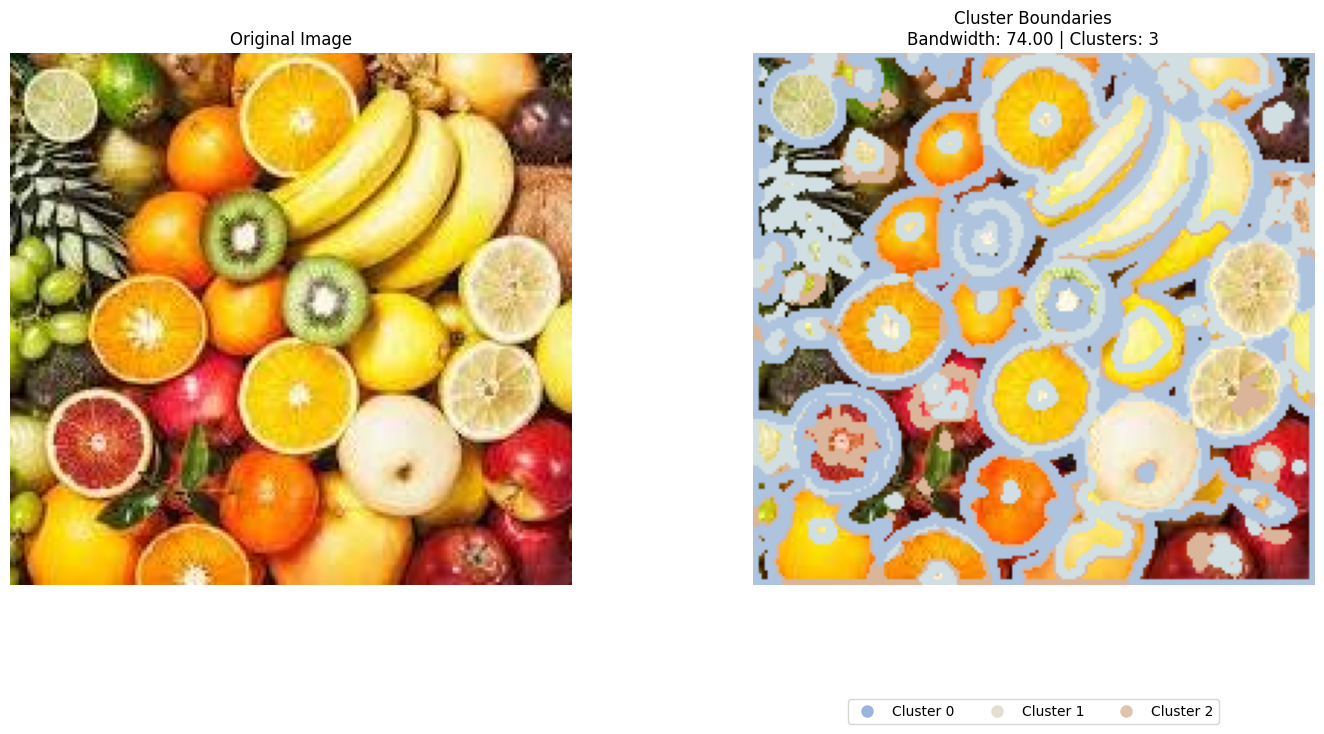

In [60]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, bandwidth, n_clusters_)


With decreased bandwidth

In [61]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 33)

In [62]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [63]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


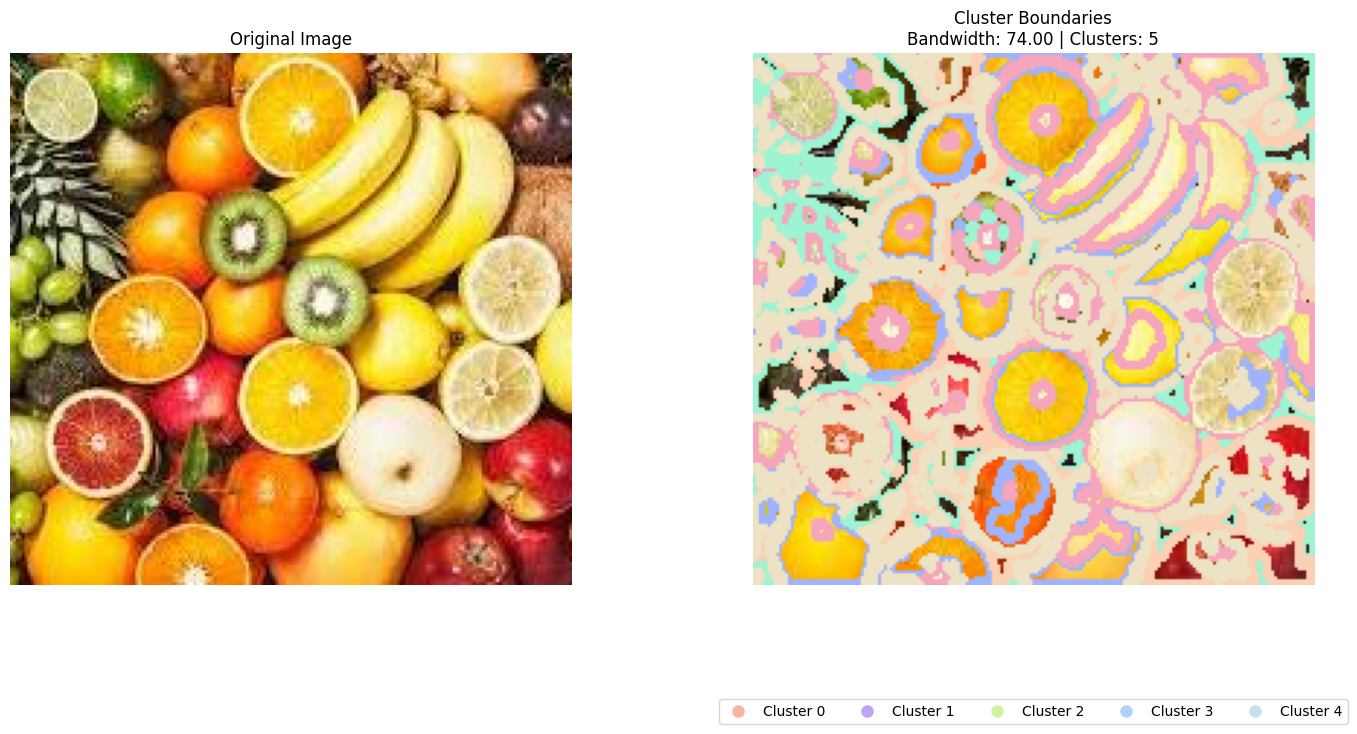

In [64]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, bandwidth, n_clusters_)

With increased Bandwidth

In [65]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 84)

In [66]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [67]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


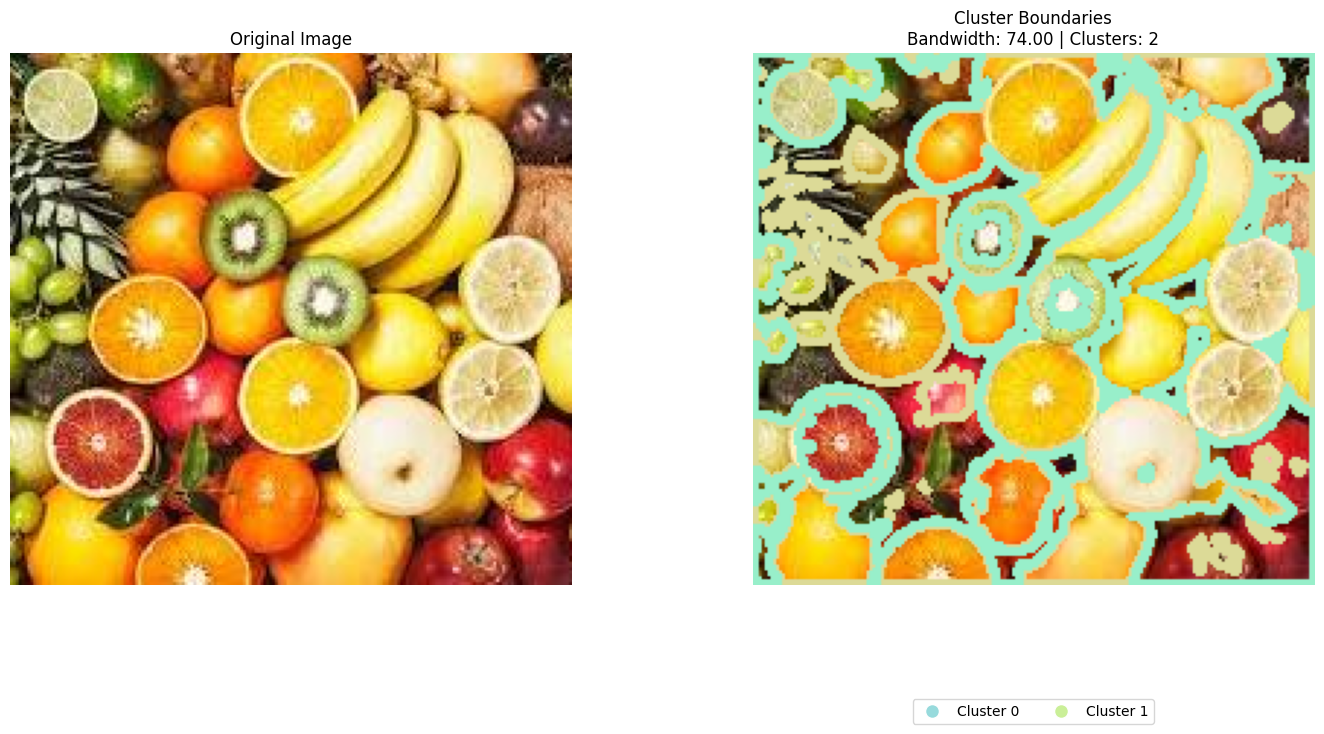

In [68]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, bandwidth, n_clusters_)

#With Second Picture

In [9]:
# Step 1: Load the image and its shape
image_path = '/content/360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg'  # Replace with your image path
originImg, originShape = load_image(image_path)

In [10]:
# Step 2: Reshape the image to a flat array (pixels x RGB)
flatImg = reshape_image_to_flat_array(originImg)

With Optimum Bandwidth

In [11]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 33)

In [12]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [13]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


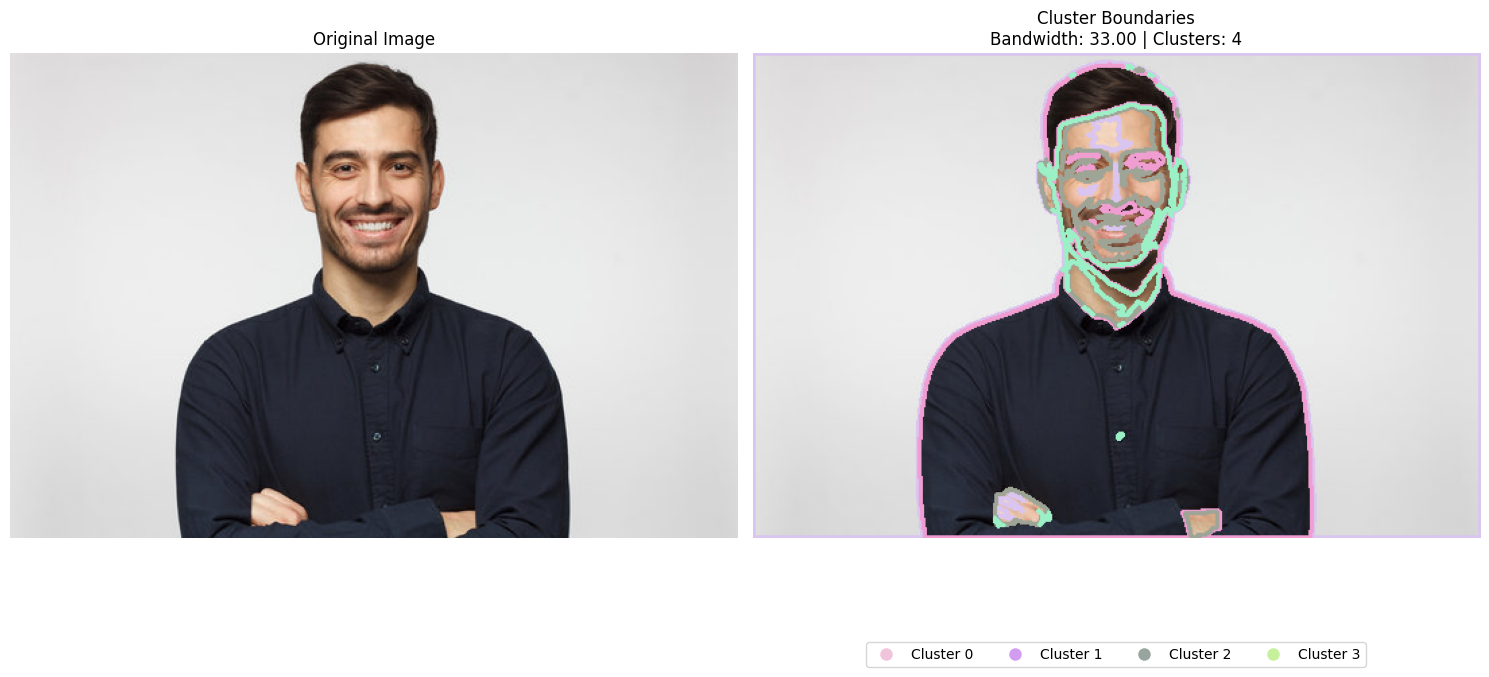

In [15]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 33, n_clusters_)

With Increased Bandwidth

In [20]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 90)

In [21]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [22]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


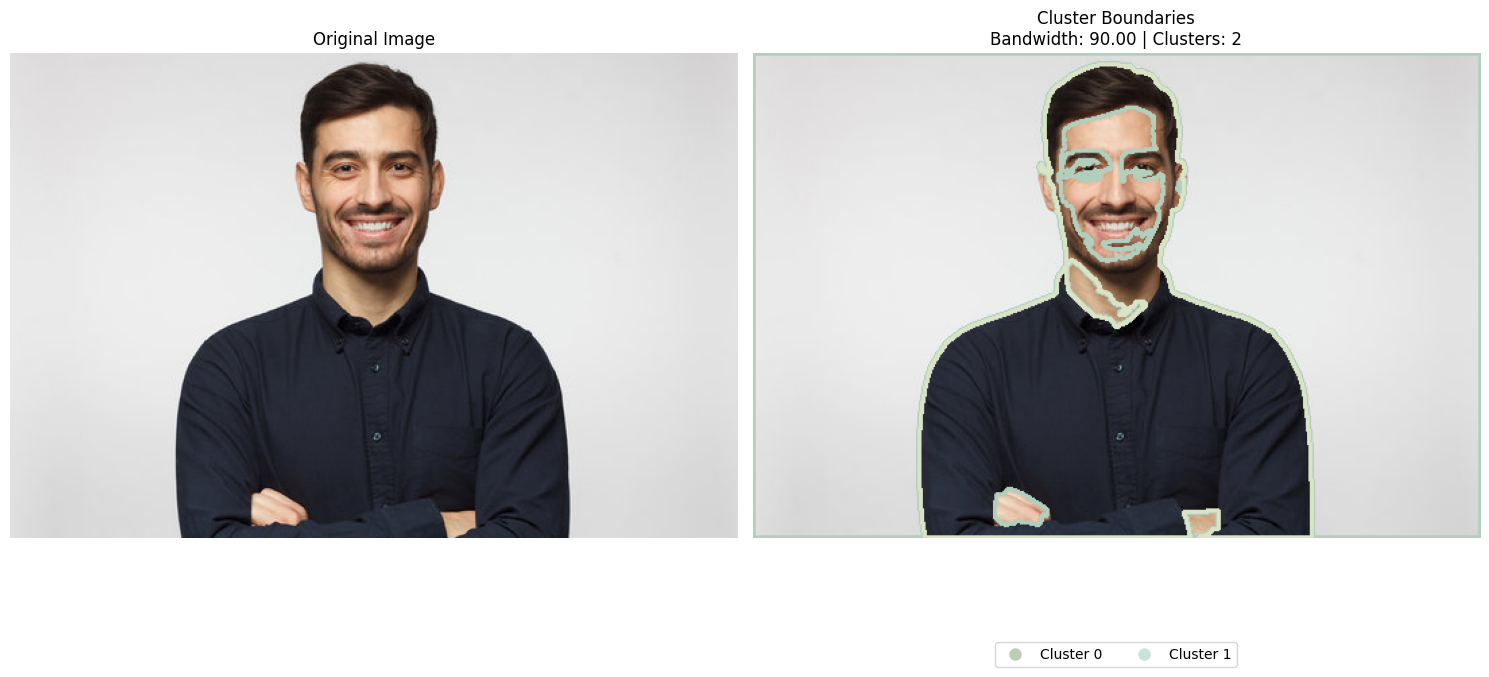

In [23]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 90, n_clusters_)

With Decreased Bandwidth

In [28]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 10)

In [29]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [30]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


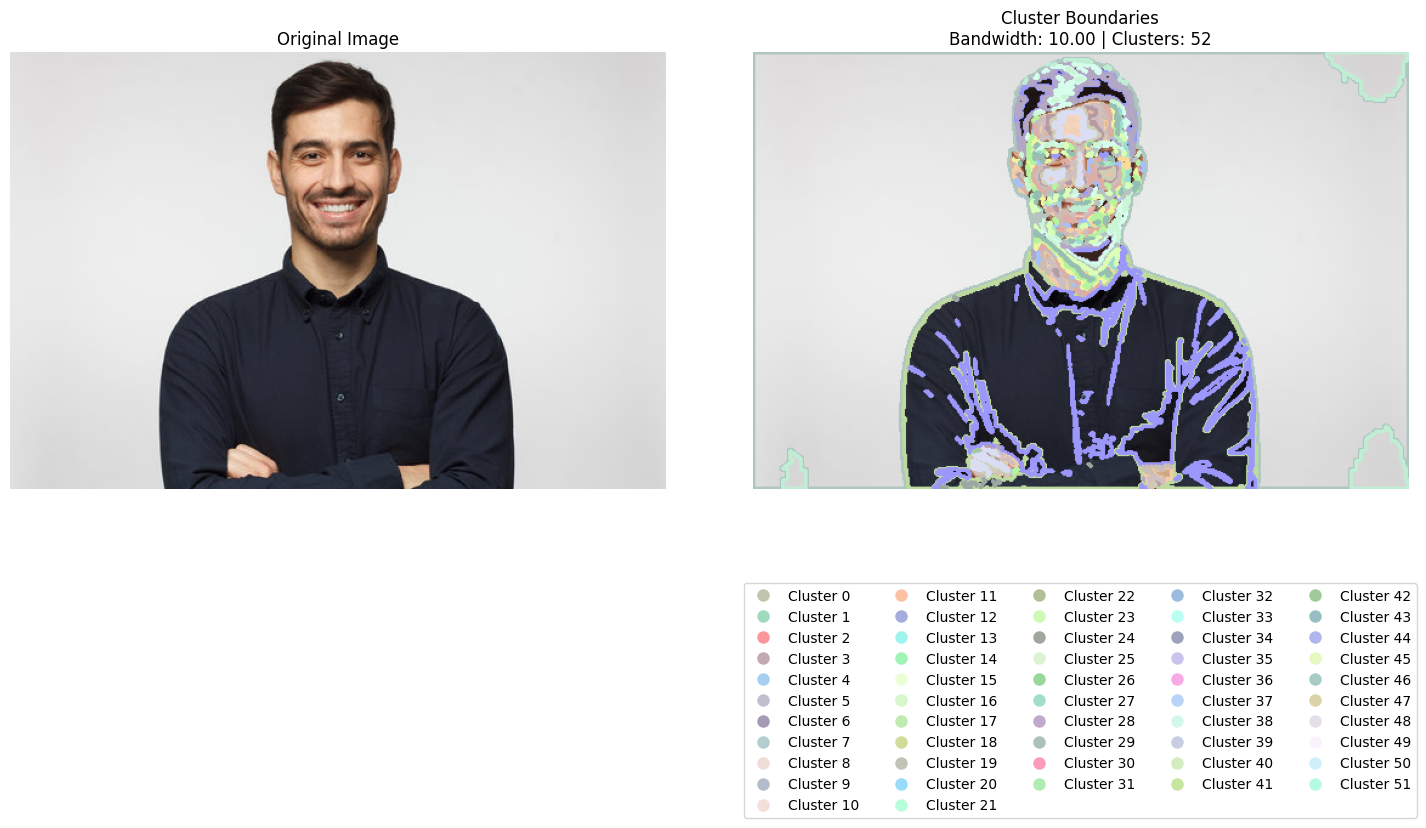

In [31]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 10, n_clusters_)

With Third Picture

In [32]:
# Step 1: Load the image and its shape
image_path = '/content/360_F_315349043_6ohfFyx37AFusCKZtGQtJR0jqUxhb25Y.jpg'  # Replace with your image path
originImg, originShape = load_image(image_path)

In [33]:
# Step 2: Reshape the image to a flat array (pixels x RGB)
flatImg = reshape_image_to_flat_array(originImg)

With Optimum Bandwidth

In [34]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 33)

In [35]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [36]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


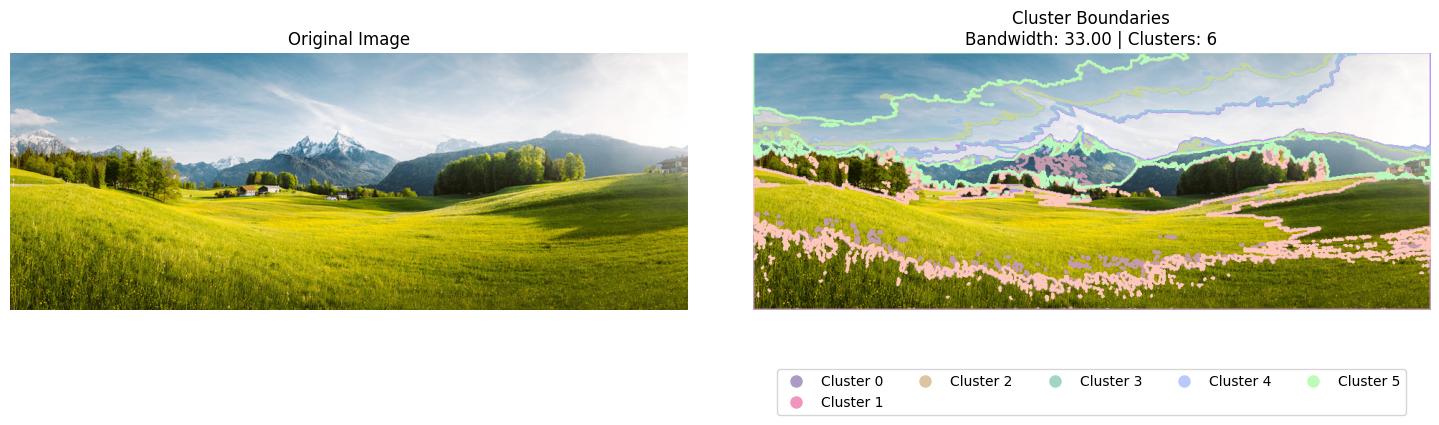

In [37]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 33, n_clusters_)

With Increased Bandwidth

In [47]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 50)

In [48]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [49]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


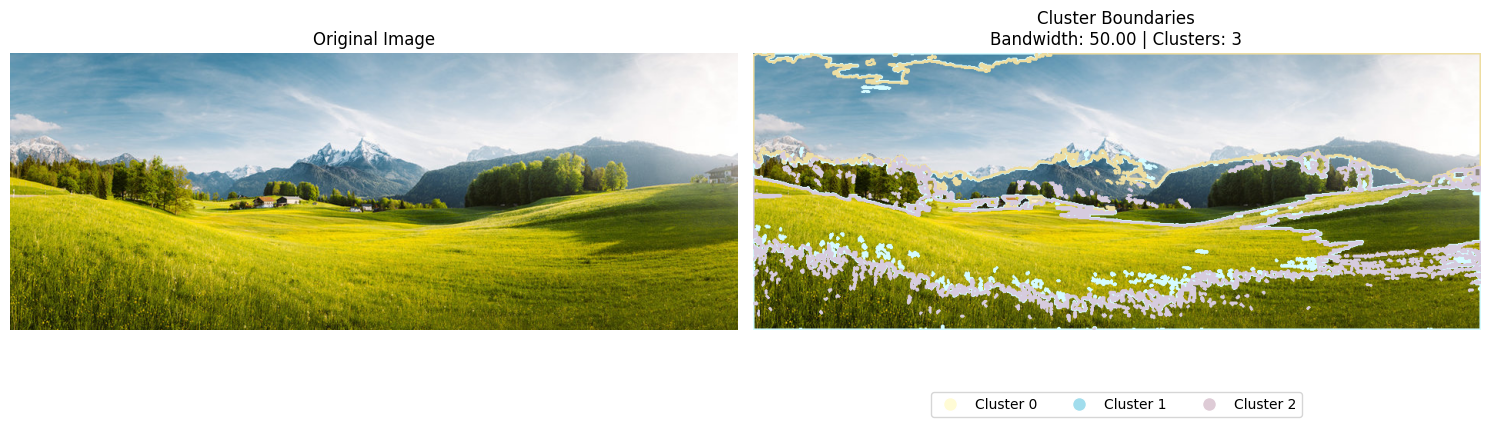

In [50]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 50, n_clusters_)

With Decreased Bandwidth

In [51]:
# Step 4: Perform MeanShift clustering
labels, cluster_centers = perform_meanshift_clustering(flatImg, 10)

In [52]:
# Step 5: Get the number of clusters and unique labels
n_clusters_, labels_unique = get_number_of_clusters(labels)


In [53]:
boundaryImg, bright_colors = draw_cluster_boundaries(originImg, labels, labels_unique, originShape)


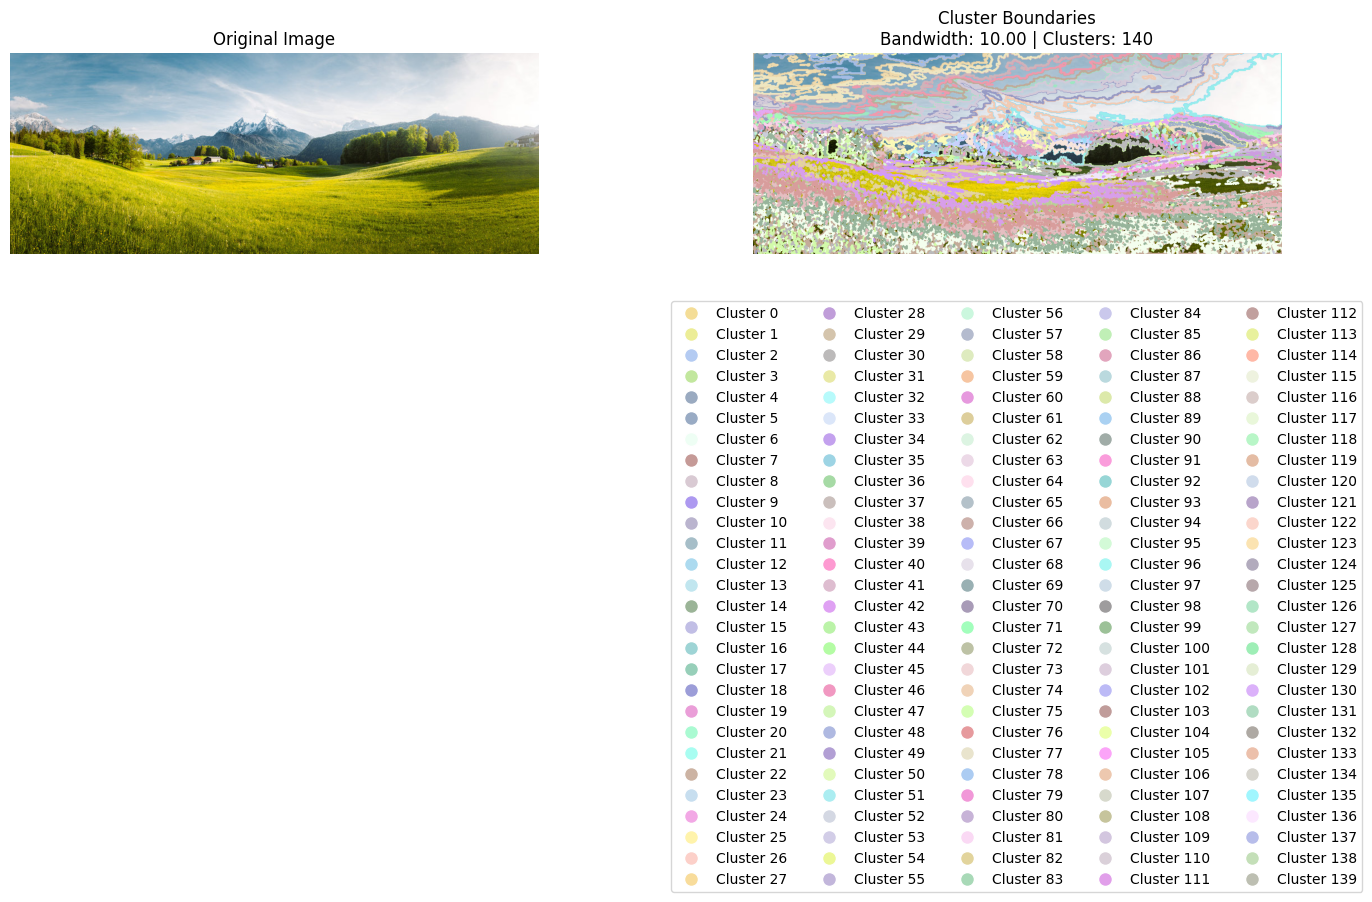

In [54]:
# Step 7: Plot the original image and the image with cluster boundaries along with the legend
plot_images_with_boundaries_and_legend(originImg, boundaryImg, bright_colors, labels_unique, 10, n_clusters_)